In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import tests

In [3]:
import torch
from tqdm.notebook import tqdm#progress bar
tensor1 = torch.tensor([1,2,3,4])
tensor1

tensor([1, 2, 3, 4])

In [4]:
a = torch.randn(3,4)
b = torch.randn(4,5)


In [5]:
a@b

tensor([[-3.6849,  1.1274, -2.0288, -2.7509, -0.4227],
        [ 0.5645, -2.5645,  2.3556, -3.0502, -0.2157],
        [-0.9624,  3.0776, -3.0744,  1.1343,  2.1694]])

In [6]:
torch.softmax(a,dim=1)

tensor([[0.0588, 0.6312, 0.2619, 0.0481],
        [0.3257, 0.5366, 0.0419, 0.0958],
        [0.0839, 0.0967, 0.3369, 0.4826]])

In [7]:
a.sigmoid()

tensor([[0.1621, 0.6750, 0.4629, 0.1367],
        [0.7768, 0.8515, 0.3094, 0.5057],
        [0.1510, 0.1702, 0.4168, 0.5058]])

In [8]:
t = torch.tensor([2.],requires_grad=True)
t

tensor([2.], requires_grad=True)

In [9]:
b = (t **2)
b

tensor([4.], grad_fn=<PowBackward0>)

In [10]:
b.backward()

In [11]:
t.grad

tensor([4.])

In [12]:
x = torch.ones(2,3,requires_grad=True)
y = torch.randn(2,3,4,requires_grad=True)

In [13]:
l = torch.exp(y.sum(dim=-1)+x.tanh()).sum()
l

tensor(79.8213, grad_fn=<SumBackward0>)

In [14]:
l.backward()

In [15]:
x.grad , y.grad

(tensor([[ 0.3014,  2.0110,  4.4829],
         [24.7598,  1.4688,  0.4991]]),
 tensor([[[ 0.7176,  0.7176,  0.7176,  0.7176],
          [ 4.7884,  4.7884,  4.7884,  4.7884],
          [10.6742, 10.6742, 10.6742, 10.6742]],
 
         [[58.9555, 58.9555, 58.9555, 58.9555],
          [ 3.4972,  3.4972,  3.4972,  3.4972],
          [ 1.1884,  1.1884,  1.1884,  1.1884]]]))

In [16]:
torch.cuda.is_available()

False

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [18]:
x = torch.randn(10,10).to(device)
x

tensor([[ 1.7479, -1.3948, -0.2215, -0.0796, -1.1501,  0.3182, -0.0620, -1.9979,
         -0.1195,  0.5405],
        [ 0.0351, -1.3497,  0.2924,  1.6796,  0.3912, -0.5483,  0.8340,  0.1931,
          1.1822,  0.2089],
        [ 0.5728, -0.6856,  0.2110,  0.2138,  0.6443,  1.5684,  0.0248,  1.1508,
          2.4466, -1.0983],
        [-1.6274,  0.4599, -0.6469,  0.4392,  0.6280,  1.0339,  0.4170,  0.0397,
         -0.1982, -1.0094],
        [-0.9747,  0.2424, -1.3042, -0.5596,  0.6311,  0.0701,  0.1804, -1.9313,
         -0.3326, -0.2928],
        [ 1.3935, -1.9229, -0.4427,  0.7026,  0.4589,  0.9514,  0.3835, -0.4150,
          0.6596,  1.1565],
        [-0.5868, -0.3314, -1.1010,  0.6090,  0.0908, -0.8489, -1.7920,  0.0424,
         -1.7354,  0.2905],
        [ 0.7890, -0.6513,  1.7622,  0.6515, -1.1353,  0.1308,  1.1583, -0.4099,
         -0.0813, -0.2141],
        [ 0.4494, -1.2436,  0.4277,  1.7099,  1.4729, -0.7174, -0.9287, -0.1320,
         -0.1803, -1.7591],
        [-0.6402,  

In [19]:
from torch import nn
x = torch.randn(10000, 10000)

In [20]:
x

tensor([[ 0.1886,  0.2188, -1.4974,  ..., -0.4870,  0.4835, -0.1705],
        [ 0.9385,  0.9701,  0.7664,  ...,  0.4626, -0.2709,  1.1775],
        [-0.7134, -0.1759,  0.1143,  ..., -0.8910, -1.2036, -0.8986],
        ...,
        [-0.3300,  0.9717,  0.1009,  ...,  1.5847,  0.0103,  1.8923],
        [ 0.3706, -0.8558, -0.2401,  ..., -1.8501, -0.8991,  0.2997],
        [-1.3287,  1.6280, -1.2783,  ...,  1.4166, -1.7772, -0.1146]])

In [21]:
#создание списка
x_python = x.tolist()

In [22]:
#длина списка
len(x_python)

10000

In [23]:
len(x_python[0])

10000

In [24]:
#цикл суммы
%%time
sum(x_python[i][j] for i in range(10000) for j in range(10000))

UsageError: Line magic function `%%time` not found.


In [25]:
#numpy array
x_numpy = x.numpy()
x_numpy

array([[ 0.1885923 ,  0.21877442, -1.4973576 , ..., -0.48702276,
         0.4834505 , -0.17048018],
       [ 0.9385252 ,  0.97009164,  0.76635087, ...,  0.46264526,
        -0.27090952,  1.1775324 ],
       [-0.7133634 , -0.17590246,  0.11428545, ..., -0.8909712 ,
        -1.2036213 , -0.8985932 ],
       ...,
       [-0.33002943,  0.971734  ,  0.10092068, ...,  1.5846843 ,
         0.01033656,  1.8923016 ],
       [ 0.3706292 , -0.8557797 , -0.24009189, ..., -1.85006   ,
        -0.8990665 ,  0.29968083],
       [-1.3286608 ,  1.6279968 , -1.2783381 , ...,  1.4166118 ,
        -1.7772166 , -0.11463422]], dtype=float32)

In [26]:
#sum function
%%time
x.sum()

UsageError: Line magic function `%%time` not found.


In [27]:
#cpu sum
x.to(device).sum()

tensor(-6172.4785)

In [28]:
x = torch.rand(5,5,requires_grad=True)
y = torch.rand(5,5,requires_grad=True)

In [29]:
l = (x*y).sum()
l.backward()#дифференцирование

In [30]:
x.grad

tensor([[0.7821, 0.3928, 0.1335, 0.4532, 0.4027],
        [0.7450, 0.6531, 0.7339, 0.6155, 0.1712],
        [0.2699, 0.0807, 0.0580, 0.4263, 0.1020],
        [0.4639, 0.6395, 0.4036, 0.5970, 0.9149],
        [0.8944, 0.6104, 0.0659, 0.3266, 0.3263]])

In [31]:
l

tensor(5.3118, grad_fn=<SumBackward0>)

In [32]:
from torchvision.datasets import MNIST
import torchvision.transforms as T

In [33]:
train_set = MNIST('.MNIST',train=True, transform=T.ToTensor(),download=True)

In [34]:
test_set = MNIST('.MNIST',train=False,transform=T.ToTensor(),download=True)

In [35]:
from torch.utils.data import Dataset,DataLoader

In [36]:
len(train_set)

60000

In [37]:
out = train_set[1357]
out

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [38]:
train_set.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [39]:
image, label = out
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [40]:
image.size

<function Tensor.size>

In [41]:
#Model class
class MLP(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features,out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size,out_features=hidden_size,bias=False),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_size, out_features=num_classes)
        )
    def forward(self,x):
        return self.model(x)

In [42]:
IMAGE_SIZE=28
NUM_CLASSES=10
HIDDEN_SIZE=64
NUM_EPOCHS = 10#Промежуток, за который мы проходим полностью датасет
model = MLP(in_features= IMAGE_SIZE**2,num_classes=NUM_CLASSES,hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
sheduler=None
criterion = nn.CrossEntropyLoss()#функция потерь

In [43]:
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=False)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [44]:
model.model[0].weight.shape

torch.Size([64, 784])

In [45]:
model.model[0].bias.shape

torch.Size([64])

In [46]:
#Нужно мешать обучающую выборку, иначе ничего не будет работать
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set,batch_size=64,shuffle=False)

In [47]:
for images,labels in train_loader:
    print(images,labels)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [48]:
#plot losses
from IPython.display import clear_output
def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [49]:
#ОЧЕНЬ ВАЖНО!!!
import matplotlib.pyplot as plt
def train():
    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    for epoch in range(1, NUM_EPOCHS + 1):
        train_loss, train_accuracy = 0.0, 0.0
        model.train()
        for images, labels in tqdm(train_loader, desc='Training'):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            logits = model(torch.flatten(images, start_dim=1))
            # logits: batch_size x num_classes
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.shape[0]
            train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        if scheduler is not None:
            scheduler.step()

        train_loss /= len(train_loader.dataset)
        train_accuracy /= len(train_loader.dataset)
        train_losses += [train_loss]
        train_accuracies += [train_accuracy]

        test_loss, test_accuracy = 0.0, 0.0
        model.eval()
        for images, labels in tqdm(test_loader, desc='Validating'):
            images = images.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                logits = model(torch.flatten(images, start_dim=1))
                # logits: batch_size x num_classes
                loss = criterion(logits, labels)

            test_loss += loss.item() * images.shape[0]
            test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        test_loss /= len(test_loader.dataset)
        test_accuracy /= len(test_loader.dataset)
        test_losses += [test_loss]
        test_accuracies += [test_accuracy]
        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)

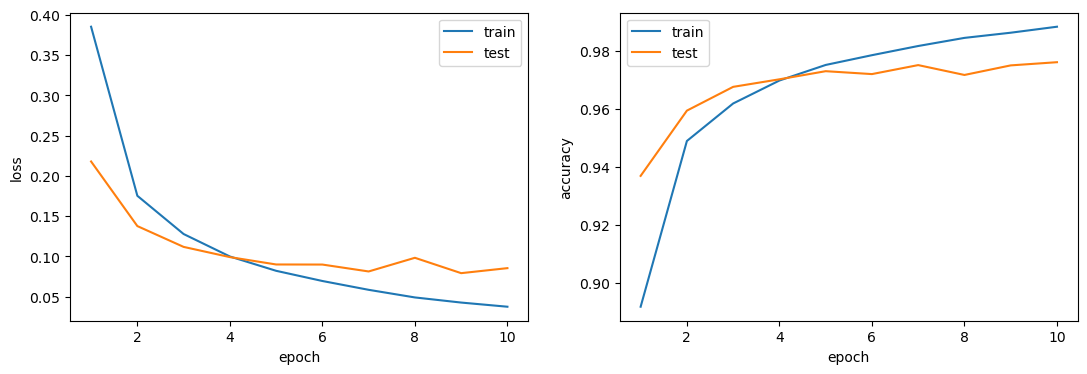

In [50]:
IMAGE_SIZE=28
NUM_CLASSES=10
HIDDEN_SIZE=64
NUM_EPOCHS = 10#Промежуток, за который мы проходим полностью датасет
model = MLP(in_features= IMAGE_SIZE**2,num_classes=NUM_CLASSES,hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler=None
criterion = nn.CrossEntropyLoss()#функция потерь
train()

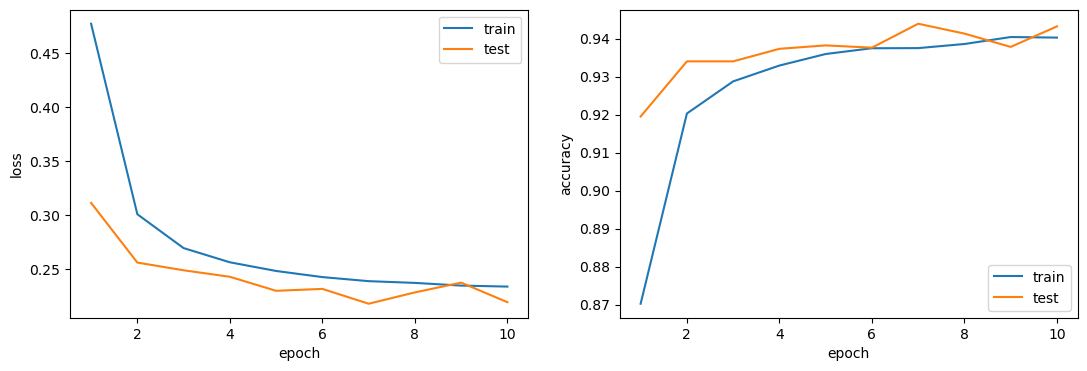

In [51]:
IMAGE_SIZE=28
NUM_CLASSES=10
HIDDEN_SIZE=64
NUM_EPOCHS = 10#Промежуток, за который мы проходим полностью датасет
model = MLP(in_features= IMAGE_SIZE**2,num_classes=NUM_CLASSES,hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-2)#добавление компоненты с l2 регуляризатором
scheduler=None
criterion = nn.CrossEntropyLoss()#функция потерь
train()

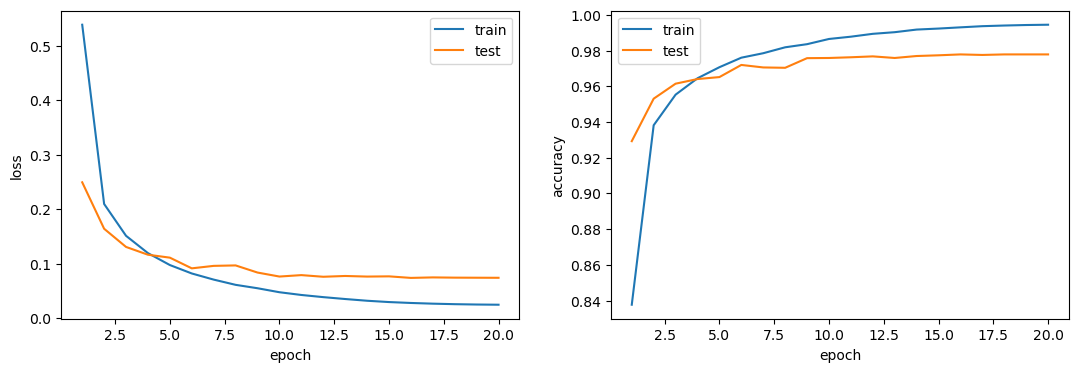

In [53]:
#Расписание-то, как меняется learning rate по ходу оптимизации
IMAGE_SIZE=28
NUM_CLASSES=10
HIDDEN_SIZE=64
NUM_EPOCHS = 20#Промежуток, за который мы проходим полностью датасет
model = MLP(in_features= IMAGE_SIZE**2,num_classes=NUM_CLASSES,hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2,momentum=0.9)
scheduler= torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=NUM_EPOCHS)
criterion = nn.CrossEntropyLoss()#функция потерь
train()

In [55]:
x = torch.ones(5,10)
x

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [57]:
dropout = nn.Dropout(p=0.25)
dropout.train()

Dropout(p=0.25, inplace=False)

In [58]:
dropout(x)

tensor([[1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333,
         1.3333],
        [1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 0.0000, 1.3333,
         1.3333],
        [1.3333, 1.3333, 1.3333, 1.3333, 0.0000, 0.0000, 1.3333, 1.3333, 0.0000,
         0.0000],
        [0.0000, 1.3333, 1.3333, 1.3333, 1.3333, 0.0000, 1.3333, 0.0000, 1.3333,
         0.0000],
        [1.3333, 1.3333, 1.3333, 1.3333, 0.0000, 1.3333, 0.0000, 1.3333, 1.3333,
         1.3333]])

In [59]:
dropout.eval()
dropout(x)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [67]:
batch_norm = nn.BatchNorm1d(num_features=10, affine=False)
batch_norm.train()
x = 1 + 2 * torch.randn(64,10)
y = batch_norm(x)
y

tensor([[ 2.0976e-01, -2.1528e-01,  1.5308e+00,  9.5826e-01,  7.3729e-01,
          1.0922e+00, -2.7237e-01,  8.6948e-01, -3.4497e-01, -3.4312e-02],
        [-6.3514e-01, -3.5709e-01,  7.4102e-01,  1.4192e+00,  8.1317e-01,
          4.8873e-01, -1.4704e+00, -7.1511e-01, -1.6309e-01, -9.1624e-02],
        [ 8.6523e-01, -1.0473e+00,  3.3444e-01,  7.4298e-01, -1.3343e+00,
          3.1064e-01, -9.3148e-01, -8.9072e-01,  9.4143e-01, -6.4457e-01],
        [ 1.6752e+00,  1.2820e+00, -2.0863e+00,  3.5165e-01, -1.5391e+00,
          5.0578e-01,  1.5393e+00, -5.7162e-01, -4.9633e-02,  1.5855e+00],
        [-5.4834e-01,  1.0430e+00, -1.0032e+00, -1.2839e+00, -4.7627e-01,
         -3.2143e-01, -2.5250e-01, -1.0107e+00,  1.0836e-01,  4.7090e-01],
        [ 2.8752e-01, -1.3793e+00, -9.1818e-02, -1.9613e+00,  5.5931e-02,
         -5.1214e-01,  7.7042e-01,  1.9043e+00, -1.6872e+00,  1.2501e+00],
        [-8.9983e-01,  1.4231e+00,  5.7648e-01, -1.7909e+00, -2.3229e-01,
         -1.3790e-02,  1.5908e+0

In [68]:
batch_norm.eval()
y

tensor([[ 2.0976e-01, -2.1528e-01,  1.5308e+00,  9.5826e-01,  7.3729e-01,
          1.0922e+00, -2.7237e-01,  8.6948e-01, -3.4497e-01, -3.4312e-02],
        [-6.3514e-01, -3.5709e-01,  7.4102e-01,  1.4192e+00,  8.1317e-01,
          4.8873e-01, -1.4704e+00, -7.1511e-01, -1.6309e-01, -9.1624e-02],
        [ 8.6523e-01, -1.0473e+00,  3.3444e-01,  7.4298e-01, -1.3343e+00,
          3.1064e-01, -9.3148e-01, -8.9072e-01,  9.4143e-01, -6.4457e-01],
        [ 1.6752e+00,  1.2820e+00, -2.0863e+00,  3.5165e-01, -1.5391e+00,
          5.0578e-01,  1.5393e+00, -5.7162e-01, -4.9633e-02,  1.5855e+00],
        [-5.4834e-01,  1.0430e+00, -1.0032e+00, -1.2839e+00, -4.7627e-01,
         -3.2143e-01, -2.5250e-01, -1.0107e+00,  1.0836e-01,  4.7090e-01],
        [ 2.8752e-01, -1.3793e+00, -9.1818e-02, -1.9613e+00,  5.5931e-02,
         -5.1214e-01,  7.7042e-01,  1.9043e+00, -1.6872e+00,  1.2501e+00],
        [-8.9983e-01,  1.4231e+00,  5.7648e-01, -1.7909e+00, -2.3229e-01,
         -1.3790e-02,  1.5908e+0

In [69]:
x.mean(dim=0)

tensor([1.0241, 1.0800, 0.7934, 0.6869, 1.1357, 0.9874, 0.8034, 0.4575, 0.9245,
        0.8870])

In [70]:
x.var(dim=0)

tensor([2.8679, 3.8415, 3.3989, 4.0585, 3.6710, 5.0696, 4.3609, 4.2511, 4.0504,
        3.2166])

In [71]:
y.mean(dim=0), y.var(dim=0)

(tensor([ 2.6077e-08, -2.9802e-08,  2.6077e-08,  0.0000e+00,  0.0000e+00,
         -2.9802e-08, -9.7789e-09,  1.1176e-08,  4.4703e-08,  0.0000e+00]),
 tensor([1.0159, 1.0159, 1.0159, 1.0159, 1.0159, 1.0159, 1.0159, 1.0159, 1.0159,
         1.0159]))

In [72]:
batch_norm.running_mean

tensor([0.1024, 0.1080, 0.0793, 0.0687, 0.1136, 0.0987, 0.0803, 0.0458, 0.0925,
        0.0887])

In [73]:
batch_norm.running_var

tensor([1.1868, 1.2841, 1.2399, 1.3058, 1.2671, 1.4070, 1.3361, 1.3251, 1.3050,
        1.2217])